In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simulator_setup as tsim
import os


### T-PoP, Threshold = 100%, Number of Simulations = 100, 1000 Agents, depth 2, 2 witnesses per depth

### Plots for absolute values of True Positives, True Negatives, False Positives and False Negatives

In [60]:
directory_pathfile = '/Users/amm3117/Desktop/tpop-forked/Untitled/tpop-optimised/simulations/depth_2/neighbours_2/'

dataset = tsim.full_csv(directory_pathfile)
simulations = pd.DataFrame(dataset)



In [54]:
simulations

,Unnamed: 0,Simulation number,Probability of honest cars,Probability of coerced cars,Density,Threshold,Accuracy,True Positives,True Negatives,False Positives,False Negatives,Percent True Positives,Percent True Negatives,Percent False Positives,Percent False Negatives
0,0,0,0.5,0.5,250.0,1.0,47.4,221,253,253,273,44.736842,50.000000,55.263158,50.000000
1,1,1,0.5,0.5,250.0,1.0,47.6,231,245,256,268,46.292585,48.902196,53.707415,51.097804
2,2,2,0.5,0.5,250.0,1.0,45.4,230,224,261,285,44.660194,46.185567,55.339806,53.814433
3,3,3,0.5,0.5,250.0,1.0,46.9,225,244,242,289,43.774319,50.205761,56.225681,49.794239
4,4,4,0.5,0.5,250.0,1.0,45.2,220,232,259,289,43.222004,47.250509,56.777996,52.749491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0.8,0.8,250.0,1.0,46.8,354,114,83,449,44.084682,57.868020,55.915318,42.131980
1,1,1,0.8,0.8,250.0,1.0,45.7,335,122,81,462,42.032622,60.098522,57.967378,39.901478
2,2,2,0.8,0.8,250.0,1.0,45.9,344,115,76,465,42.521632,60.209424,57.478368,39.790576
3,3,3,0.8,0.8,250.0,1.0,43.4,305,129,93,473,39.203085,58.108108,60.796915,41.891892


z Percent True Positives
     Probability of honest cars  Probability of coerced cars  \
0                           0.0                          0.0   
1                           0.0                          0.1   
2                           0.0                          0.2   
3                           0.0                          0.3   
4                           0.0                          0.4   
..                          ...                          ...   
106                         0.9                          0.7   
107                         0.9                          0.8   
108                         0.9                          0.9   
109                         0.9                          1.0   
110                         1.0                          0.0   

     Percent True Positives  
0                  0.000000  
1                  0.000000  
2                  0.000000  
3                  0.000000  
4                  0.000000  
..                      ..

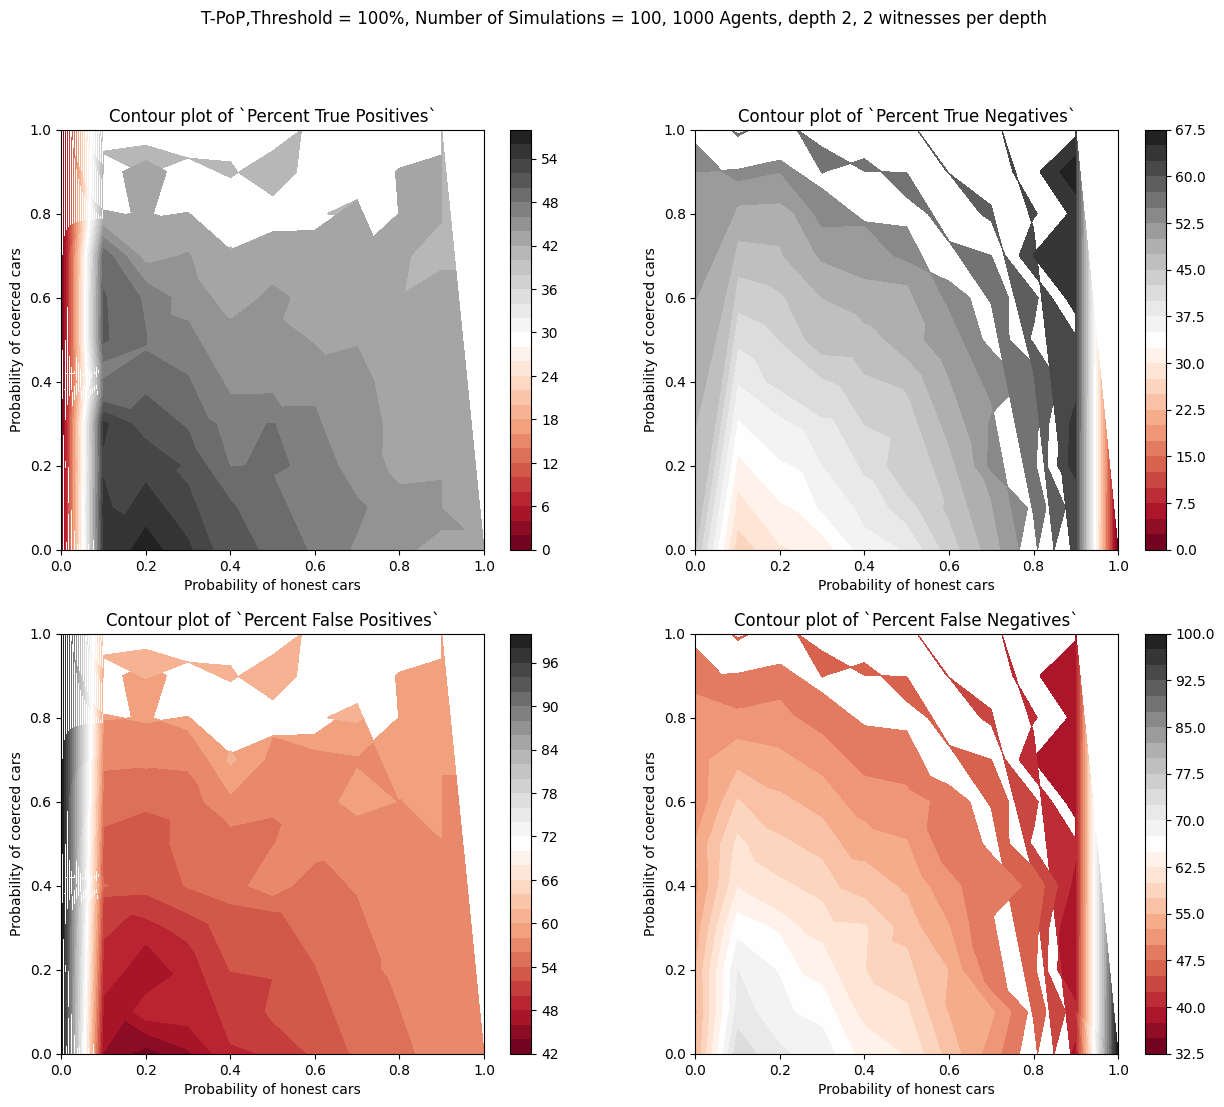

In [61]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 100%, Number of Simulations = 100, 1000 Agents, depth 2, 2 witnesses per depth')
directory_pathfile = '/Users/amm3117/Desktop/tpop-forked/Untitled/tpop-optimised/simulations/depth_2/neighbours_2/'

dataset = tsim.full_csv(directory_pathfile)

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
simulations = pd.DataFrame(dataset)
for i, ax in enumerate(axes.flat):
    print('z', vars[i])
    z = vars[i]
    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    print(df_temp.sort_values([x, y]))

    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    print('here',Z.shape)
    cp = ax.contourf(X, Y, Z, 30, cmap='RdGy')
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')

In [ ]:
simulations

i 0 z Percent True Positives
     Probability of honest cars  Probability of coerced cars  \
0                           0.0                          0.0   
1                           0.0                          0.1   
2                           0.0                          0.2   
3                           0.0                          0.3   
4                           0.0                          0.4   
..                          ...                          ...   
106                         0.9                          0.7   
107                         0.9                          0.8   
108                         0.9                          0.9   
109                         0.9                          1.0   
110                         1.0                          0.0   

     Percent True Positives  
0                  0.000000  
1                  0.000000  
2                  0.000000  
3                  0.000000  
4                  0.000000  
..                    

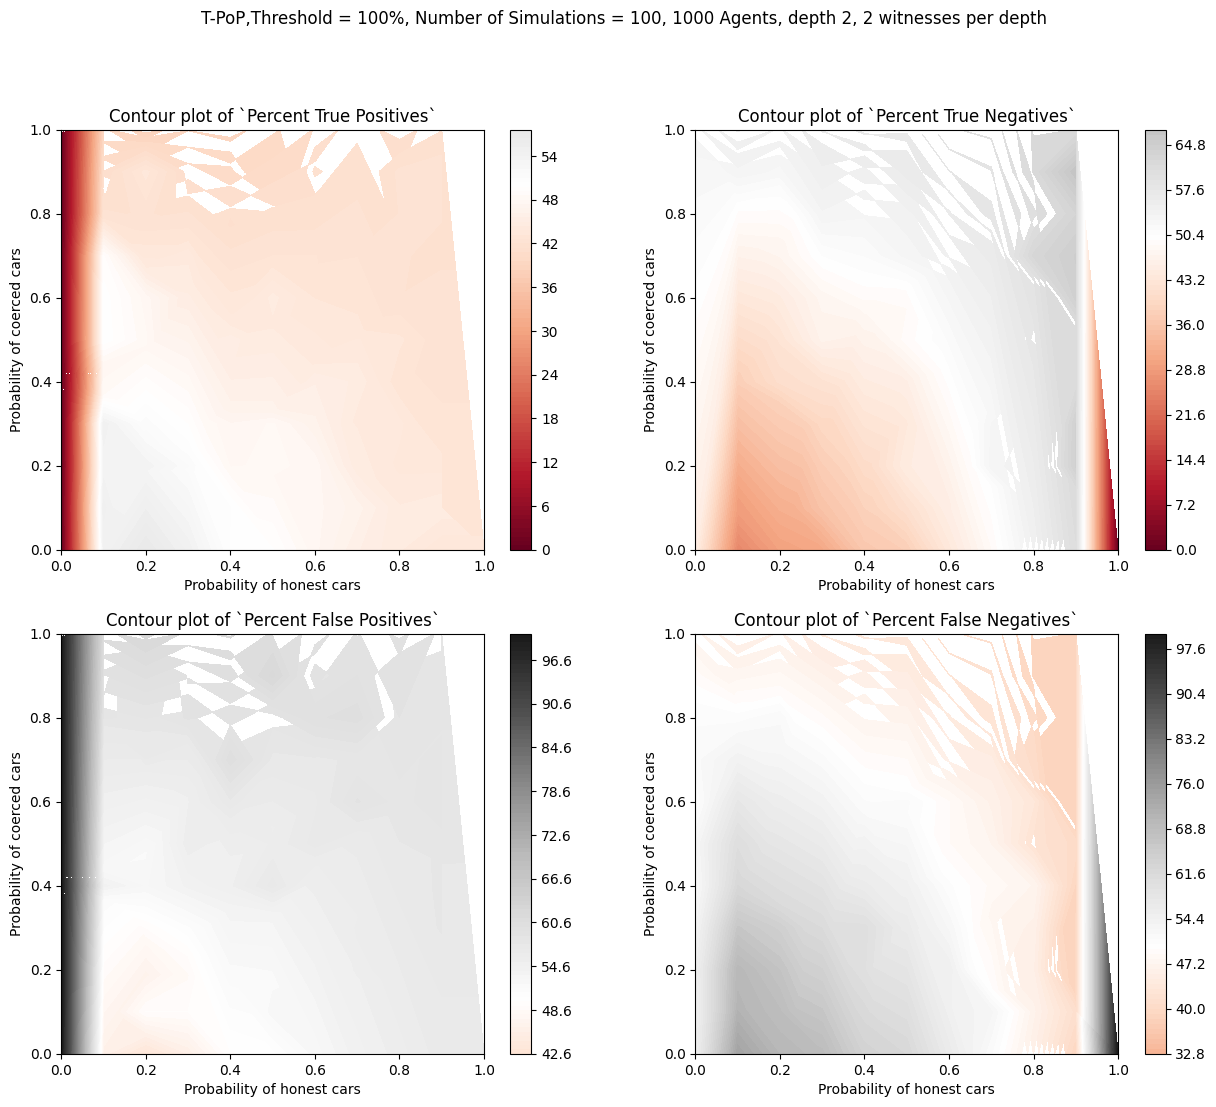

In [64]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 100%, Number of Simulations = 100, 1000 Agents, depth 2, 2 witnesses per depth')

directory_pathfile = '/Users/amm3117/Desktop/tpop-forked/Untitled/tpop-optimised/simulations/depth_2/neighbours_2/'

dataset = tsim.full_csv(directory_pathfile)
simulations = pd.DataFrame(dataset)# loading dataset

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
for i, ax in enumerate(axes.flat):
    print('i', i, 'z', vars[i])
    z = vars[i]

    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    print(df_temp.sort_values([x, y]))

    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000000, vmax = 100, cmap='RdGy', levels = 100)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')